# DATASETS REGARDING COVID-19 CASES IN THE NETHERLANDS FROM RIVM.NL WEBSITE

## A. Scrapping the Data

In [1]:
#Importing relevant library 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns 
import datetime

In [2]:
# Scrapping the 4 csv data from rivm.nl
request_data=requests.get('https://www.rivm.nl/coronavirus-covid-19/grafieken').text
soup = BeautifulSoup(request_data,'html.parser')
#print(soup.prettify())
my_table=soup.find_all('script', {'type':"application/json"})
my_table=str(my_table)
my_table=my_table.split("csv")

## B. Number of patients reported to the GGD 

In [3]:
#Data cleaning process 
table_1 = my_table[4]
table_1 = table_1.replace('\\u0022', '')
table_1 = table_1.split("data:")[0]
table_1 = str(table_1).split(']","pre')[0]
table_1 = str(table_1).split("ren],")[1]
table_1 = table_1.replace("]", '')
table_1 = table_1.split("[")

In [4]:
#Setting the data frame 
df1 = pd.DataFrame([sub.split(",") for sub in table_1 ])
df1.drop([3], axis=1, inplace=True)
df1.drop(0,inplace=True)
df1.columns=["day_month","Reported_New_Cases","Reported_Previous_Cases"]

In [5]:
#Changing the numerical columns from string to integer and adding a total column 
df1.Reported_New_Cases = pd.to_numeric(df1.Reported_New_Cases, downcast='integer')
df1.Reported_Previous_Cases = pd.to_numeric(df1.Reported_Previous_Cases, downcast='integer')
df1.loc[:,"Reported_Total_Cases"] = df1.Reported_New_Cases + df1.Reported_Previous_Cases

In [6]:
#Setting the date data to date form for pandas library
df1['Year']= '2020'
df1['date']=df1.day_month+' '+ df1.Year
df1.date=df1.date.str.replace("mrt","mar")
df1.date=pd.to_datetime(df1.date).dt.date
df1.drop(['day_month'], axis=1, inplace=True)
df1.drop(['Year'], axis=1, inplace=True)
df1 = df1[['date', 'Reported_New_Cases', 'Reported_Previous_Cases', 'Reported_Total_Cases']]
#df1=df1.set_index('date')

In [7]:
df1.head()

,date,Reported_New_Cases,Reported_Previous_Cases,Reported_Total_Cases
1,2020-02-27,0,3,3
2,2020-02-28,0,4,4
3,2020-02-29,0,12,12
4,2020-03-01,0,13,13
5,2020-03-02,0,47,47


In [8]:
df1.tail()

,date,Reported_New_Cases,Reported_Previous_Cases,Reported_Total_Cases
40,2020-04-06,16,740,756
41,2020-04-07,35,977,1012
42,2020-04-08,326,913,1239
43,2020-04-09,898,48,946
44,2020-04-10,65,0,65


In [9]:
df1.Reported_Total_Cases.sum()

23097

In [10]:
#df1.to_csv (r'C:\Users\dell\Desktop\Tableau_Covid19\data_rivm_reported.csv',  index = True, header=True)

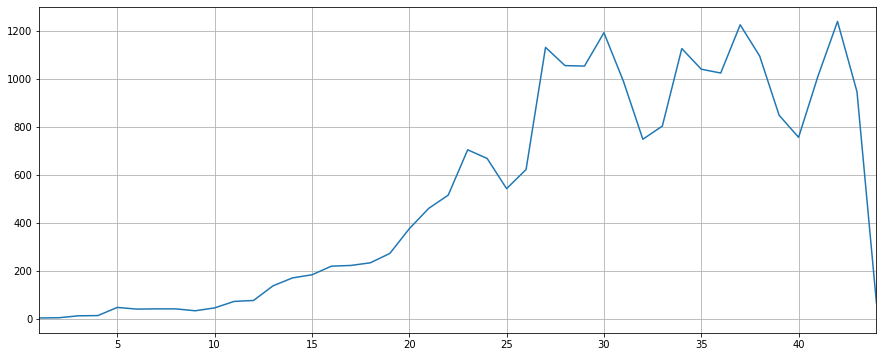

In [11]:
df1.Reported_Total_Cases.plot(kind='line', x='date', y='Reported_Total_Cases', grid=True, figsize=(15,6))

(array([737485., 737492., 737499., 737506., 737516., 737523.]),
 <a list of 6 Text xticklabel objects>)

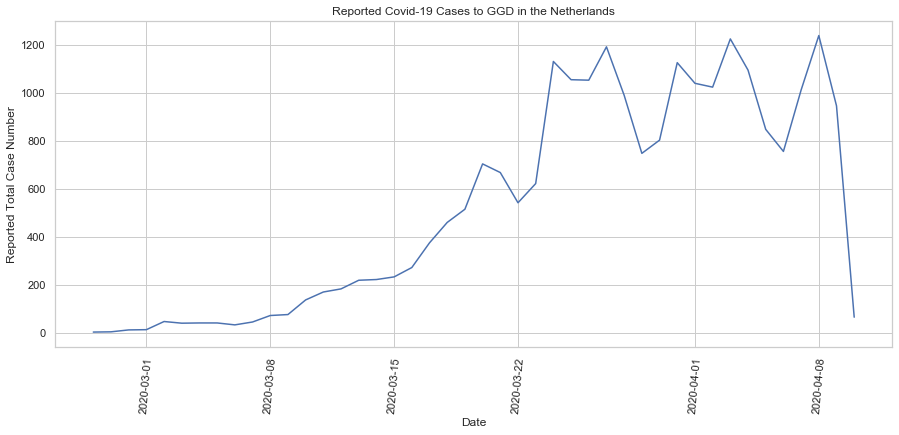

In [12]:
plt.figure(figsize=(15,6))
sns.set(style="whitegrid")
ax = sns.lineplot(y=df1.Reported_Total_Cases, x=df1.date, data=df1, palette='rainbow', ci=None)
ax.set(xlabel='Date', ylabel='Reported Total Case Number', title='Reported Covid-19 Cases to GGD in the Netherlands')
plt.xticks(rotation=85)

## C. Number of hospitalized patients by reporting date

In [13]:
#Data cleaning process 
table_2 = my_table[3]
table_2 = table_2.replace('\\u0022', '')
table_2 = table_2.split("data:")[0]
table_2 = table_2.split(']","pre')[0]
table_2 = table_2.split("ren],")[1]
table_2 = table_2.replace("]", '')
table_2 = table_2.split("[")

In [14]:
#Setting the data frame 
df2 = pd.DataFrame([sub.split(",") for sub in table_2 ])
df2.drop([3], axis=1, inplace=True)
df2.drop(0,inplace=True)
df2.columns=["day_month","Hospitalized_New_Cases","Hospitalized_Previous_Cases"]

In [15]:
#Changing the numerical columns from string to integer and adding a total column 
df2.Hospitalized_New_Cases = pd.to_numeric(df2.Hospitalized_New_Cases, downcast='integer')
df2.Hospitalized_Previous_Cases = pd.to_numeric(df2.Hospitalized_Previous_Cases, downcast='integer')
df2.loc[:,"Hospitalized_Total_Cases"] = df2.Hospitalized_New_Cases + df2.Hospitalized_Previous_Cases

In [16]:
#Setting the date data to date form for pandas library
df2['Year']= '2020'
df2['date']=df2.day_month+' '+ df2.Year
df2.date=df2.date.str.replace("mrt","mar")
df2.date=pd.to_datetime(df2.date).dt.date
df2.drop(['day_month'], axis=1, inplace=True)
df2.drop(['Year'], axis=1, inplace=True)
df2 = df2[['date', 'Hospitalized_New_Cases', 'Hospitalized_Previous_Cases', 'Hospitalized_Total_Cases']]
#df2=df2.set_index('date')

In [17]:
df2.head()

,date,Hospitalized_New_Cases,Hospitalized_Previous_Cases,Hospitalized_Total_Cases
1,2020-02-27,0,1,1
2,2020-02-28,0,0,0
3,2020-02-29,0,2,2
4,2020-03-01,0,1,1
5,2020-03-02,0,3,3


In [18]:
df2.tail()

,date,Hospitalized_New_Cases,Hospitalized_Previous_Cases,Hospitalized_Total_Cases
40,2020-04-06,9,195,204
41,2020-04-07,30,168,198
42,2020-04-08,51,102,153
43,2020-04-09,73,0,73
44,2020-04-10,5,0,5


In [19]:
df2.Hospitalized_Total_Cases.sum()

8197

In [20]:
#df2.to_csv (r'C:\Users\dell\Desktop\Tableau_Covid19\data_rivm_hospitalized.csv',  index = True, header=True)

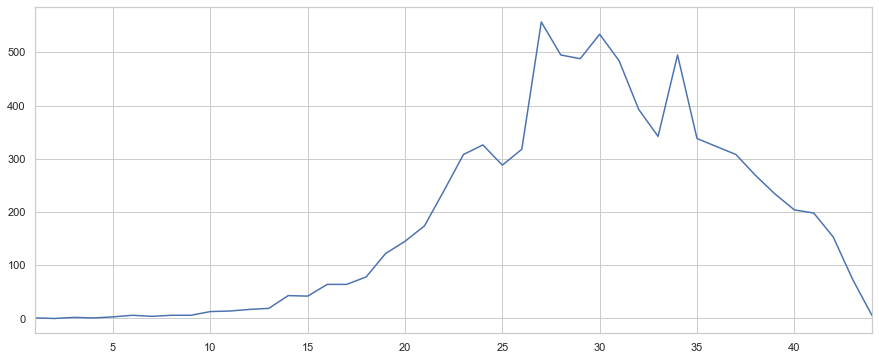

In [21]:
df2.Hospitalized_Total_Cases.plot(kind='line', x='date', y='Hospitalized_Total_Cases', grid=True, figsize=(15,6))

(array([737485., 737492., 737499., 737506., 737516., 737523.]),
 <a list of 6 Text xticklabel objects>)

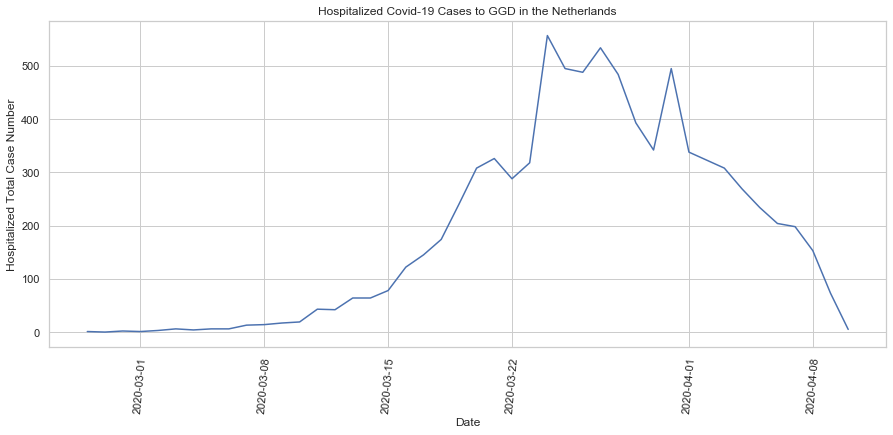

In [22]:
plt.figure(figsize=(15,6))
sns.set(style="whitegrid")
ax = sns.lineplot(y=df2.Hospitalized_Total_Cases, x=df2.date, data=df2, palette='rainbow', ci=None)
ax.set(xlabel='Date', ylabel='Hospitalized Total Case Number', title='Hospitalized Covid-19 Cases to GGD in the Netherlands')
plt.xticks(rotation=85)

## D. Number of deceased by date of death

In [23]:
#Data cleaning process 
table_3 = my_table[2]
table_3 = table_3.replace('\\u0022', '')
table_3 = table_3.split("data:")[0]
table_3 = str(table_3).split(']","pre')[0]
table_3 = str(table_3).split("ren],")[1]
table_3 = table_3.replace("]", '')
table_3 = table_3.split("[")

In [24]:
#Setting the data frame 
df3 = pd.DataFrame([sub.split(",") for sub in table_3 ])
df3.drop([3], axis=1, inplace=True)
df3.drop(0,inplace=True)
df3.columns=["day_month","New_Cases","Previous_Cases"]

In [25]:
#Setting the date data to date form for pandas library
df3.New_Cases = pd.to_numeric(df3.New_Cases, downcast='integer')
df3.Previous_Cases = pd.to_numeric(df3.Previous_Cases, downcast='integer')
df3.loc[:,"Deaths"] = df3.New_Cases + df3.Previous_Cases

In [26]:
#Setting the date data to date form for pandas library
df3['Year']= '2020'
df3['date']=df3.day_month+' '+ df3.Year
df3.date=df3.date.str.replace("mrt","mar")
df3.date=pd.to_datetime(df3.date).dt.date
df3.drop(['day_month'], axis=1, inplace=True)
df3.drop(['Year'], axis=1, inplace=True)
df3 = df3[['date', 'New_Cases', 'Previous_Cases', 'Deaths']]
#df3=df3.set_index('date')

In [27]:
df3.head()

,date,New_Cases,Previous_Cases,Deaths
1,2020-02-27,0,0,0
2,2020-02-28,0,0,0
3,2020-02-29,0,0,0
4,2020-03-01,0,0,0
5,2020-03-02,0,0,0


In [28]:
df3.tail()

,date,New_Cases,Previous_Cases,Deaths
40,2020-04-06,9,131,140
41,2020-04-07,17,107,124
42,2020-04-08,48,56,104
43,2020-04-09,23,3,26
44,2020-04-10,3,0,3


In [29]:
df3.Deaths.sum()

2504

In [30]:
#df3.to_csv (r'C:\Users\dell\Desktop\Tableau_Covid19\data_rivm_death.csv',  index = True, header=True)

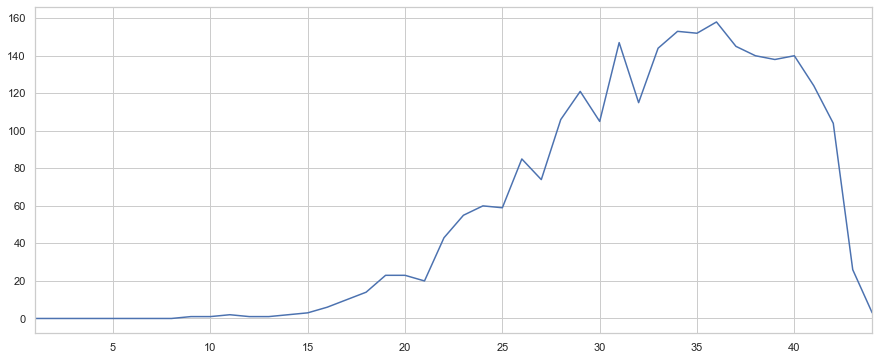

In [31]:
df3.Deaths.plot(kind='line', x='date', y='Deaths', grid=True, figsize=(15,6))

(array([737485., 737492., 737499., 737506., 737516., 737523.]),
 <a list of 6 Text xticklabel objects>)

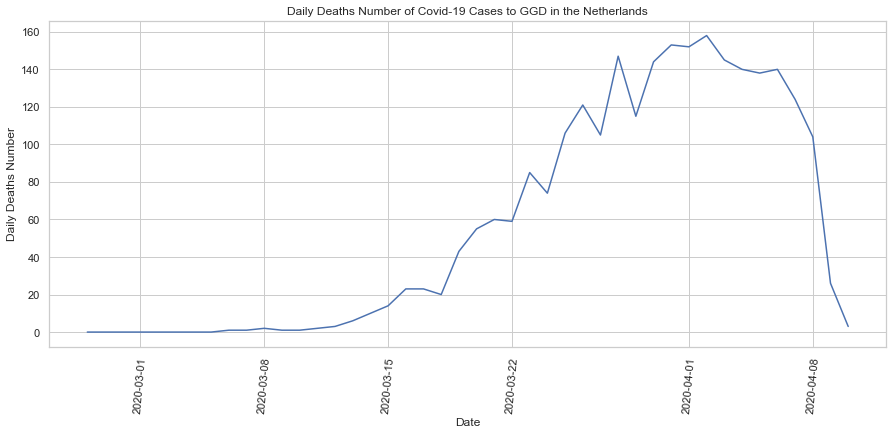

In [32]:
plt.figure(figsize=(15,6))
sns.set(style="whitegrid")
ax = sns.lineplot(y=df3.Deaths, x=df3.date, data=df3, palette='rainbow', ci=None)
ax.set(xlabel='Date', ylabel='Daily Deaths Number', title='Daily Deaths Number of Covid-19 Cases to GGD in the Netherlands')
plt.xticks(rotation=85)

## E. Merging of the datasets

In [37]:
df_merged0=pd.merge(df1,df2[['date', 'Hospitalized_New_Cases', 'Hospitalized_Previous_Cases', 'Hospitalized_Total_Cases']], on='date', how="left") #Left join
df_merged=pd.merge(df_merged0,df3[['date', 'New_Cases', 'Previous_Cases', 'Deaths']], on='date', how="left") #Left join
df_merged.tail()

,date,Reported_New_Cases,Reported_Previous_Cases,Reported_Total_Cases,Hospitalized_New_Cases,Hospitalized_Previous_Cases,Hospitalized_Total_Cases,New_Cases,Previous_Cases,Deaths
39,2020-04-06,16,740,756,9,195,204,9,131,140
40,2020-04-07,35,977,1012,30,168,198,17,107,124
41,2020-04-08,326,913,1239,51,102,153,48,56,104
42,2020-04-09,898,48,946,73,0,73,23,3,26
43,2020-04-10,65,0,65,5,0,5,3,0,3


In [ ]:
#df_merged.to_csv (r'C:\Users\dell\Desktop\Tableau_Covid19\data_rivm_reported_hospitalized_deaths',  index = True, header=True)

### Plotting the Merged Dataset in a one plot

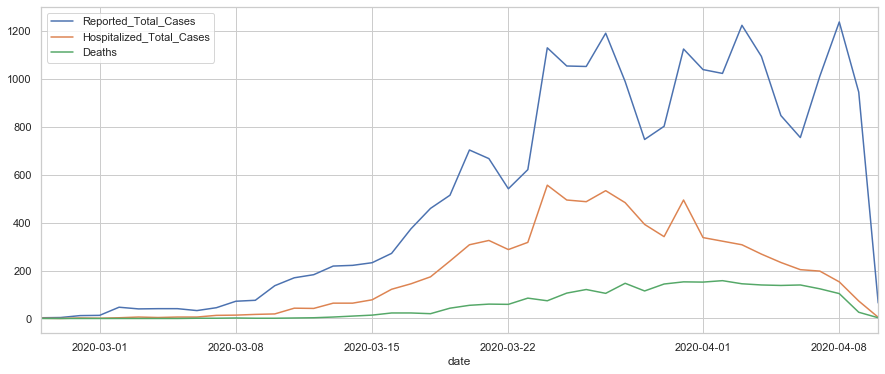

In [45]:
df_merged.plot(kind='line', x='date', y=['Reported_Total_Cases', 'Hospitalized_Total_Cases', 'Deaths'], grid=True, figsize=(15,6))